# **Guided Lab 344.4.2 - Python Seaborn Line Plot and Create Data Visualizations**

## **Overview:**
This lab provides a comprehensive guide to creating line plots using the Seaborn library in Python. Line plots are useful for visualizing the relationship between two continuous variables over a continuous axis such as time. Seaborn is a powerful visualization library built on top of Matplotlib, offering enhanced aesthetics and ease of use.

## **Learning Objectives:**

By the end of this lab, learners will be able to:

- Create line plots using Seaborn's lineplot() function.
- Customize line plots to visualize trends and patterns in data effectively.
- Manage categorical data to add confidence intervals to line plots.
- Define advanced customization options for enhancing the aesthetics of line plots.
- Acquire practical skills for saving line plots for presentation.
- Demonstrate how to incorporate categorical variables into line plots for visualizing relationships between different category publications.

**Prerequisites:**

- Basic understanding of Python programming.
- Familiarity with data manipulation and visualization concepts.

## **Introducing the Dataset**
In this lab, we will use dataset of Daily Exchange Rates per Euro 1999-2023.

**[click here to download dataset (euro-daily-hist_1999_2022.csv)](https://drive.google.com/file/d/1cBpzpg9yCG-ZBwPOW6-MSyBXpSmN5WNL/view?usp=sharing)**




## **Read in and clean the dataframe.**


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('euro-daily-hist_1999_2022.csv')
df

In [ ]:
df = df.iloc[:, [0, 1, 4, -2]]
df

In [ ]:
df.columns = ['Date', 'Australian dollar', 'Canadian dollar', 'US dollar']
df

In [ ]:
df = pd.melt(df, id_vars='Date', value_vars=['Australian dollar', 'Canadian dollar', 'US dollar'], value_name='Euro rate', var_name='Currency')
df

This above line of code is using the **`pd.melt()`** function from the Pandas library to reshape the DataFrame df. Here is a breakdown of each parameter:

**`df:`** This is the DataFrame that you want to reshape.

**`id_vars='Date'`**: This specifies the column(s) in the DataFrame that you want to keep as identifier variables (i.e., the columns that you do not want to reshape).

**`value_vars=['Australian dollar', 'Canadian dollar', 'US dollar']`:** This parameter specifies the column(s) that you want to melt or unpivot. These columns will be converted from wide format to long format.

**`value_name='Euro rate'`:** This parameter assigns a name to the column that will store the values after melting. In this case, it renames the melted column to 'Euro rate'.
**`var_name='Currency'`**: This parameter specifies the name of the column that will store the variable names corresponding to the melted values. It renames this column to 'Currency'.

In [ ]:
# converts the 'Date' column to datetime format, filters the DataFrame to include only rows from December 2022 onwards, and resets the index of the filtered DataFrame.
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date']>='2022-12-01'].reset_index(drop=True)
df

In [ ]:
# This line of code converts the values in the 'Euro rate' column of DataFrame df to numeric format using the pd.to_numeric() function from the Pandas library.

#This conversion is useful when the values in the 'Euro rate' column are stored as strings or other non-numeric data types and need to be treated as numeric values for mathematical operations or plotting.

df['Euro rate'] = pd.to_numeric(df['Euro rate'])
print(f'Currencies: {df.Currency.unique()}\n')
print(df.head())
print(f'\n{df.Date.dt.date.min()}/{ df.Date.dt.date.max()}')

Currencies: ['Australian dollar' 'Canadian dollar' 'US dollar']

        Date           Currency  Euro rate
0 2023-12-15  Australian dollar     1.6324
1 2023-12-14  Australian dollar     1.6288
2 2023-12-13  Australian dollar     1.6452
3 2023-12-12  Australian dollar     1.6398
4 2023-12-11  Australian dollar     1.6420

2022-12-01/2023-12-15


The resulting dataframe contains daily (business days) Euro rates for Australian, Canadian, and US dollars for the period from 01.12.2022 until 27.01.2023 inclusive.

### **Example 1 - Creating a single Seaborn line plot.**

**1.1** - We can create a line plot showing the relationships between two continuous variables as follows:


In [ ]:
#This line filters the DataFrame df to select only the rows where the 'Currency' column has the value 'US dollar',
# resets the index of the resulting DataFrame after filtering,  the index of the new DataFrame will start from 0
usd = df[df['Currency']=='US dollar'].reset_index(drop=True)
sns.lineplot(x='Date', y='Euro rate', data=usd)

The above graph shows the **EUR-USD**rate dynamics. We defined the variables to plot on the x and y axes (the x and y parameters) and the dataframe (data) to take these variables from.

**1.2** - For comparison, to create the same plot using **relplot()**, we would write the following:

In [ ]:
sns.relplot(x='Date', y='Euro rate', data=usd, kind='line')
#By default, this relplot() function creates a scatter plot. so we passed in one more argument specific to the relplot() function: kind='line'.

### **Example 2 - Customizing a single seaborn line plot**
We can customize the above chart in many ways to make it more readable and informative. For example, we can adjust the figure size, add title and axis labels, adjust the font size, customize the line, add and customize markers, etc. Let's see how to implement these improvements in Seaborn.

**2.1 - Adjusting the figure size:**

Since Seaborn is built on top of matplotlib, we can use matplotlib.pyplot to adjust the figure size:



In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd)

**2.2 - Instead, with relplot(), we can use the height and aspect (the width-to-height ratio) parameters for the same purpose:**




In [ ]:
sns.relplot(x='Date', y='Euro rate', data=usd, kind='line', height=6, aspect=4)

## **Example 3 - Adding a title and axis labels**

**3.1 **- To add a graph title and axis labels, we can use the `set()` function on the seaborn line plot object passing in the title, xlabel, and ylabel arguments:




In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd).set(title='Euro-USD rate', xlabel='Date', ylabel='Rate')

### **Example 4.1 - Adjusting the font size:**

A convenient way to adjust the font size is to use the **set_theme()** function and experiment with different values of the font_scale parameter:

In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd).set(title='Euro-USD rate', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=1.3)

Note that we also added `style='white'` to avoid overriding the initial style.

### **Example 5 - Changing the line color, style, and size**
To customize the plot line, we can pass in some optional parameters in common with `matplotlib.pyplot.plot`, such as `color`, `linestyle`, or `linewidth`:

In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd, linestyle='dotted', color='magenta', linewidth=5).set(title='Euro-USD rate', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=3)

### **Example 6 - Adding markers and customizing their color, style, and size**

It's possible to add markers on the line and customize their appearance. Also, in this case, we can use some parameters from matplotlib, such as `marker`, `markerfacecolor`, or `markersize`:

The [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) provides us with the ultimate list of the parameters to use for improving the aesthetics of a seaborn line plot. In particular, we can see all the [possible choices of markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).

In [ ]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd, marker='*', markerfacecolor='limegreen', markersize=12).set(title='Euro-USD rate', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=1.3)

### **Example 7 - Creating a seaborn line plot with multiple lines**
### **Example 7.1 - Seaborn Line Plots With Multiple Lines**
Often, we need to explore how several continuous variables change depending on another continuous variable. For this purpose, we can build a Seaborn line plot with multiple lines. The functions **`lineplot()`** and **`relplot()`** are also applicable to such cases.

Technically, it's possible to create a seaborn line plot with multiple lines just by building a separate axes object for each dependent variable, i.e., each line:

In [ ]:
#filters the DataFrame df to select only the rows where the 'Currency' column has the value 'Australian dollar' and  the index of the new DataFrame will start from 0.
aud = df[df['Currency']=='Australian dollar'].reset_index(drop=True)
#filters the DataFrame df to select only the rows where the 'Currency' column has the value 'Canadian dollar' and the index of the new DataFrame will start from 0.
cad = df[df['Currency']=='Canadian dollar'].reset_index(drop=True)
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd)
sns.lineplot(x='Date', y='Euro rate', data=aud)
sns.lineplot(x='Date', y='Euro rate', data=cad)

Above, we extracted two more subsets from our initial dataframe df – for Australian and Canadian dollars – and plotted each euro rate against time. However, there are more efficient solutions to it: using the hue, style, or size parameters, available in both lineplot() and relplot().

### **Examnple 7.2 - Using the hue parameter:**
The hue parameter works as follows: we assign to it the name of a dataframe column containing categorical values, and then Seaborn generates a line plot for each category giving a different color to each line:




In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=df, hue='Currency')

With just one line of simple code, we created a seaborn line plot for three categories. Note that we passed in the initial dataframe df instead of its subsets for different currencies.

### **Example 7.3 - Adding a title and axis labels and Adjust fonts size**
We can adjust the figure size, add a title and axis labels, and change the font size of the above graph in the same way as we did for a single line plot:

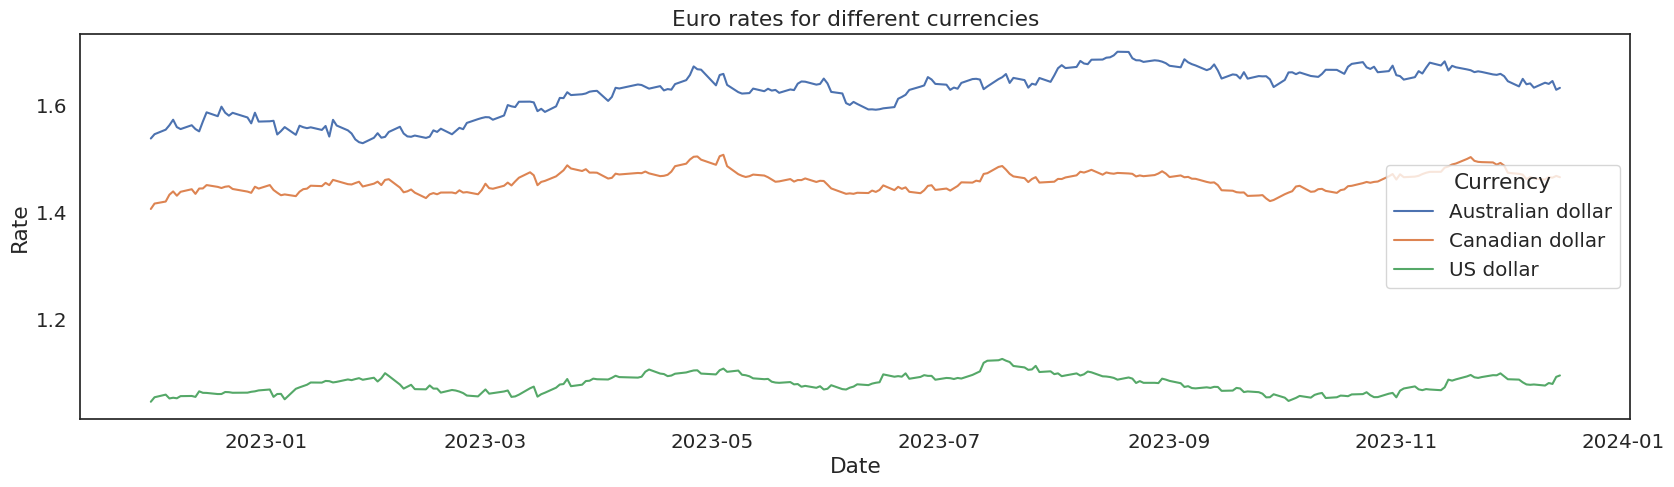

In [ ]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=df, hue='Currency').set(title='Euro rates for different currencies', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=2)

### **Example 7.4 - Changing the color, style, and size of ea**ch line
Earlier, we saw that when the ``hue`, `style`, or `size` parameters are used, Seaborn provides a default set of colors/styles/sizes for a line plot with multiple lines. If necessary, we can override these defaults and select colors/styles/sizes by ourselves.

When we use the `hue` parameter, we can also pass in the `palette` argument as a list or tuple of matplotlib color names:

In [ ]:
fig = plt.subplots(figsize=(20,7))
sns.lineplot(x='Date', y='Euro rate', data=df, hue='Currency', palette=['magenta', 'deepskyblue', 'yellowgreen']).set(title='Euro rates for different currencies', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=1.5)

### **Example 7.5 - Adding markers and customizing their color, style, and size**

We may want to add markers on our Seaborn multiple line plot.

To add markers of the same color, style, and size on all the lines, we need to use the parameters from matplotlib, such as `marker`, `markerfacecolor`, `markersize`, etc., just as we did for a single line plot:




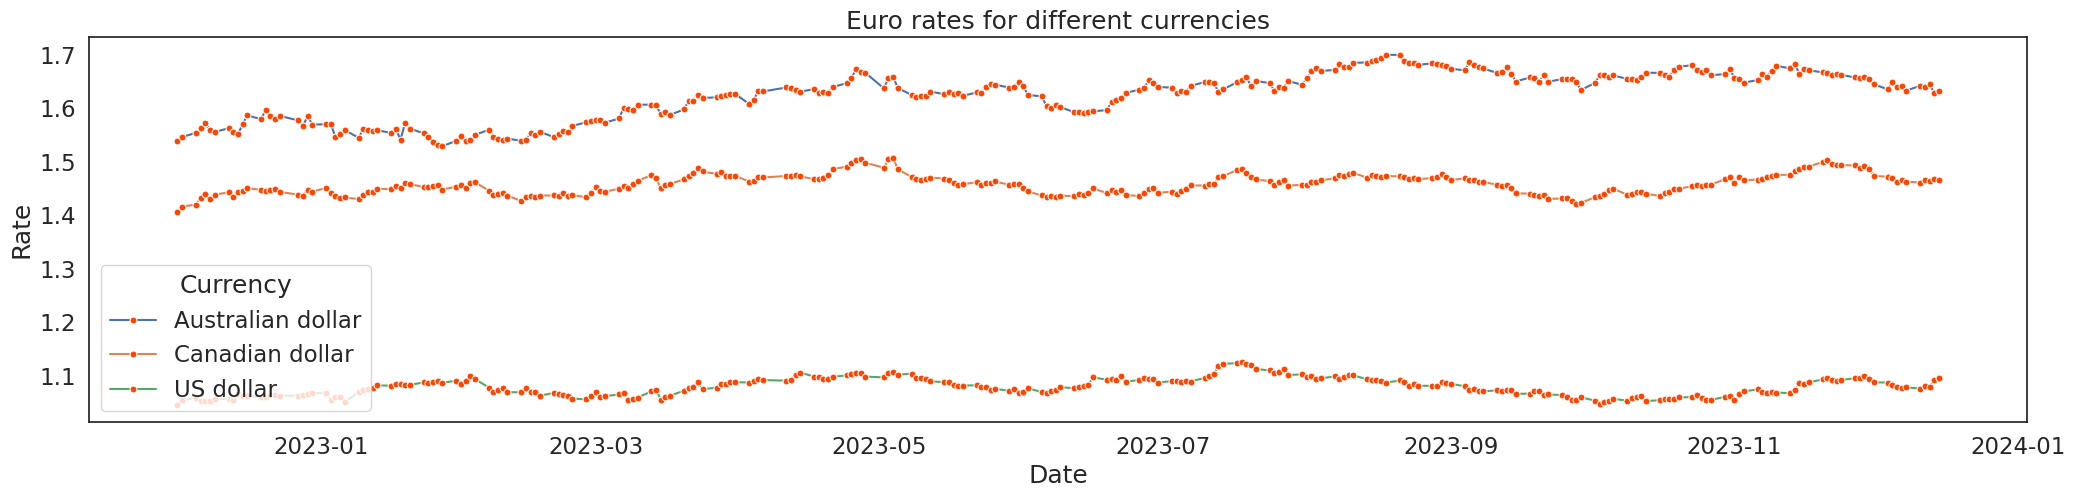

In [ ]:
fig = plt.subplots(figsize=(25, 5))
sns.lineplot(x='Date', y='Euro rate', data=df, hue='Currency', marker='o', markerfacecolor='orangered', markersize=5).set(title='Euro rates for different currencies', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=1.5)

Things are different, though, when we want different markers for each line. In this case, we need to use the markers parameter, which, according to Seaborn functionalities, works only when the style parameter is specified:

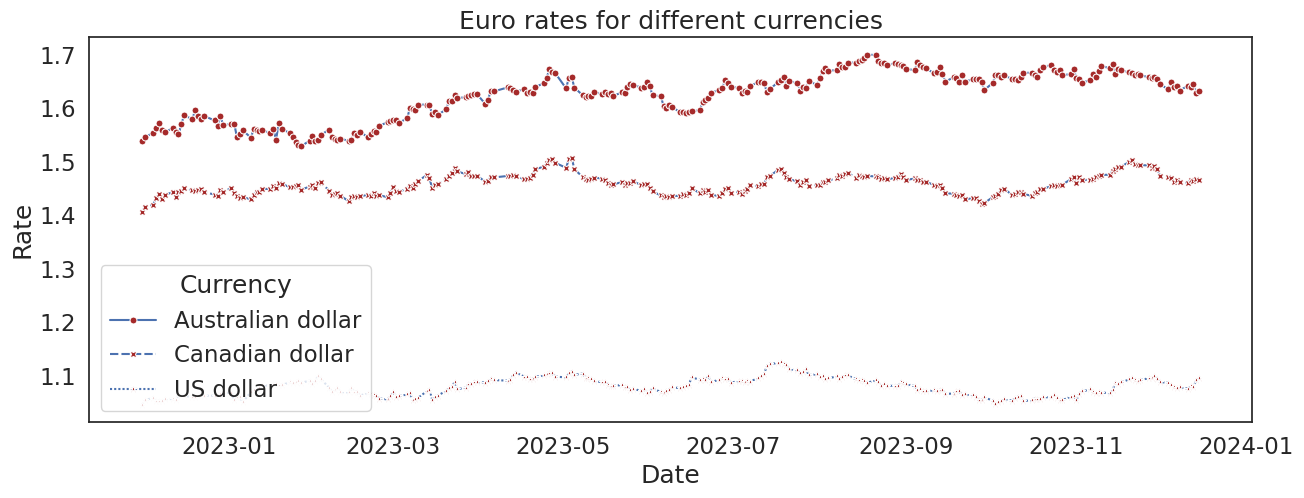

In [ ]:
fig = plt.subplots(figsize=(25, 5))
sns.lineplot(x='Date', y='Euro rate', data=df, style='Currency', markers=['o', 'X', '*'], markerfacecolor='brown', markersize=5).set(title='Euro rates for different currencies', xlabel='Date', ylabel='Rate')
sns.set_theme(style='white', font_scale=1.5)